In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan =pd.read_csv(r"C:\Users\adars\Downloads\train_ctrUa4K.csv")

## EDA

In [4]:
loan.shape

(614, 13)

In [5]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
features_with_na = [features for features in loan.columns if loan[features].isnull().sum()>=1]

In [10]:
features_with_na # to identify the columns with null values

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
numerical_features = loan.select_dtypes(exclude = 'object').columns.tolist() # seperating the categorical and numerical features
categorical_features = loan.select_dtypes(include = 'object').columns.tolist()

In [12]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [13]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [14]:
discrete_features = [feature for feature in numerical_features if len(loan[feature].unique())<=11]

In [15]:
discrete_features

['Loan_Amount_Term', 'Credit_History']

In [16]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features]

In [17]:
continous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

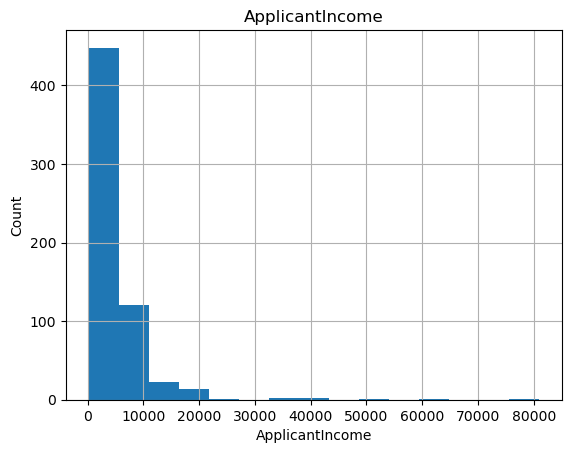

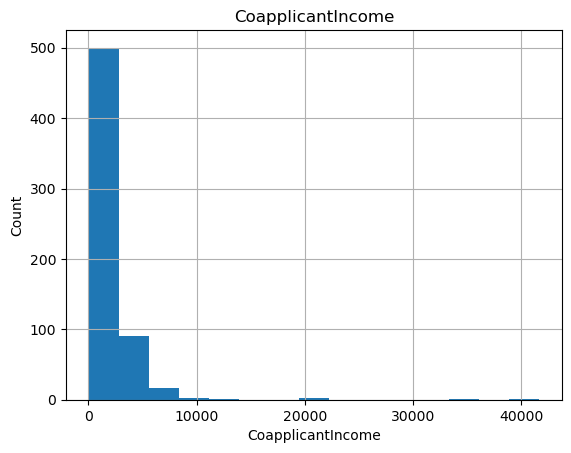

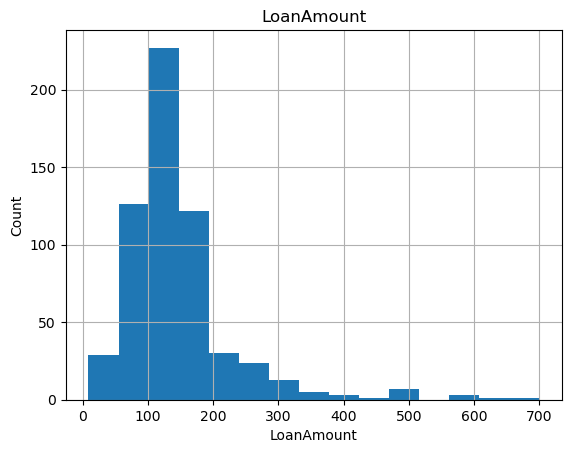

In [18]:
#this shows the distribution of the continous features
for feature in continous_features:
    data = loan.copy()
    data[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

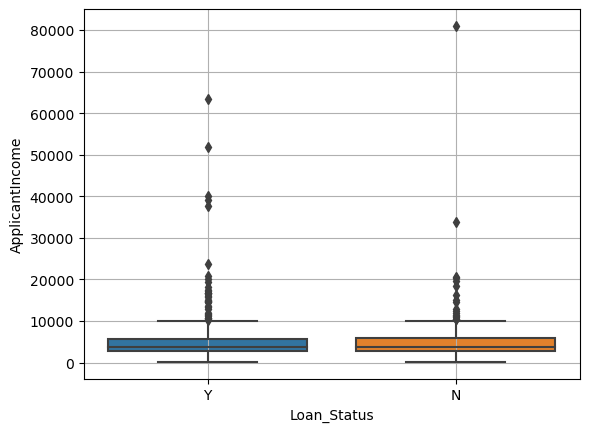

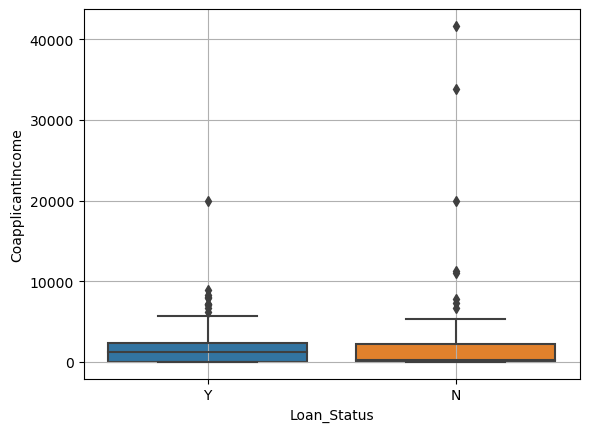

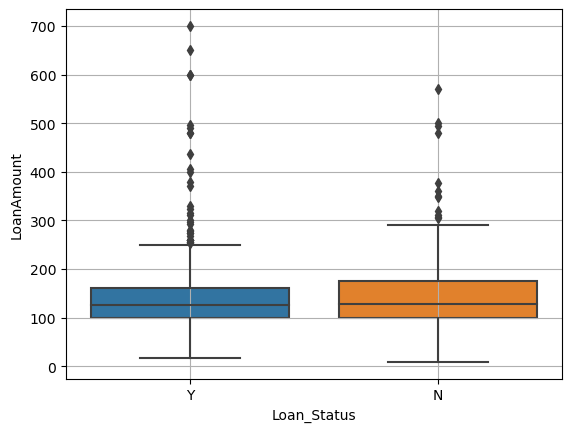

In [19]:
for features in continous_features:
        sns.boxplot(y = loan[features], x = loan['Loan_Status'])
        plt.figure
        plt.grid()
        plt.show()
       

In [ ]:
# from these plots it is clear that Annual income slighly plays an important role for loan approval.Although Higher loan amount 
# are also accepted but there is slight chance that it might be rejected.

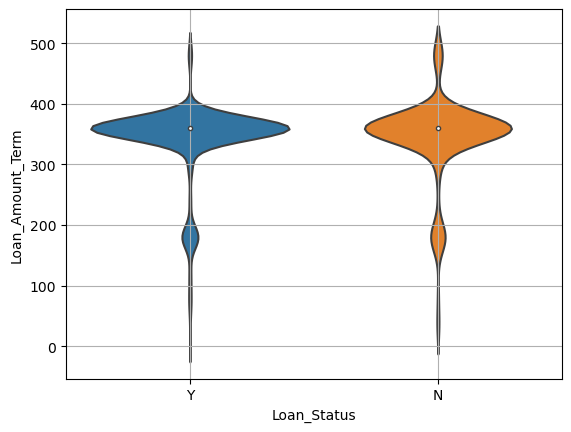

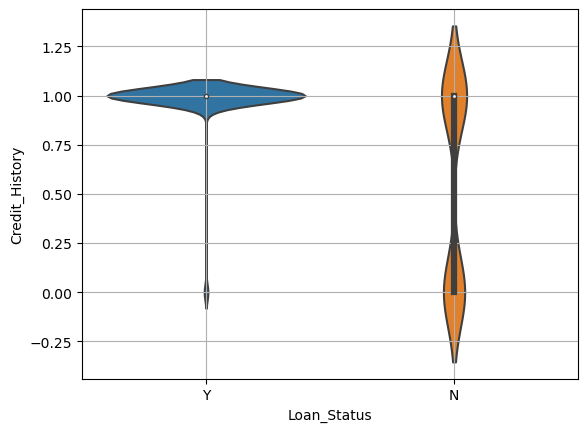

In [20]:
for features in discrete_features:
        sns.violinplot(y = loan[features], x = loan['Loan_Status'])
        plt.grid()
        plt.show()
       

In [ ]:
# this plot was to check any relation between the discrete features and target variable

In [21]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

## Filling null Values

In [22]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
# filling null values with mode since they are categorical

In [23]:
for features in categorical_features:
    if features != 'Loan_ID':
         loan[features] = loan[features].fillna(loan[features].mode().iloc[0])

In [24]:
continous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

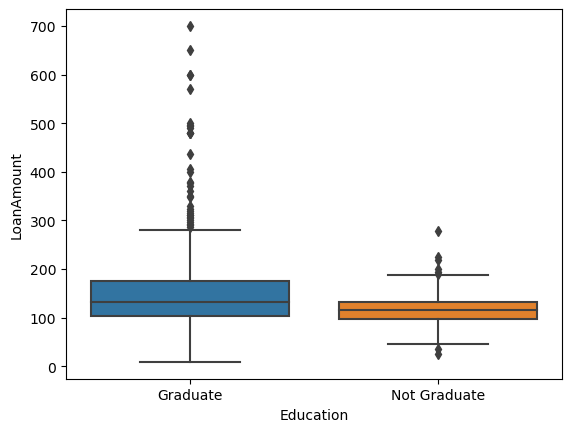

In [25]:
sns.boxplot(x = 'Education', y = 'LoanAmount', data = loan);

In [26]:
loan_temp = loan.groupby(loan['Education']).median()

In [27]:
loan_temp

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Education,,,,,
Graduate,4000.0,1059.0,132.0,360.0,1.0
Not Graduate,3357.5,1356.5,115.0,360.0,1.0


In [ ]:
# Since there is a relationship between education and loan amount lets use that to create a function and fill the null values

In [28]:
def loan_fillna(cols):
    LoanAmount = cols[0]
    Education = cols[1]
    
    if pd.isnull(LoanAmount):
        if Education == 'Graduate':
            return 132
        else:
            return 115
        
    else:
        return LoanAmount
    

In [29]:
loan['LoanAmount'] = loan[['LoanAmount','Education']].apply(lambda x: loan_fillna(x), axis =1)

In [30]:
for features in ['Loan_Amount_Term', 'Credit_History']:
        loan[features] = loan[features].fillna(loan[features].mode().iloc[0])

In [32]:
loan.shape

(614, 13)

In [33]:
categorical_features.remove('Loan_ID')

In [34]:
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

## Encoding the Categorical values

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [36]:
columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

label_encoder = LabelEncoder()
encoded_columns = loan[columns_to_encode].apply(label_encoder.fit_transform)

loan_encoded = loan.drop(columns=columns_to_encode)
loan_encoded = pd.concat([loan_encoded, encoded_columns], axis=1)


In [37]:
loan_encoded.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Education,Self_Employed,Loan_Status
0,LP001002,0,5849,0.0,132.0,360.0,1.0,Urban,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,Rural,1,1,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,1,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Urban,1,1,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,0,1


In [38]:
Property_Area_encoded = label_encoder.fit_transform(loan['Property_Area'])
Property_Area_encoded[0:100]

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1])

In [48]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
Property_onehot = onehot.fit_transform(Property_Area_encoded.reshape(-1,1))
Property_onehot_matrix = Property_onehot.toarray()
Property_onehot_matrix = pd.DataFrame(Property_onehot_matrix, columns = ['Rural', 'Semiurban', 'Urban'])


In [47]:
loan.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [49]:
loan = pd.concat([loan_encoded, Property_onehot_matrix], axis = 1)

In [51]:
loan = loan.drop('Property_Area', axis = 1 )

In [53]:
loan.shape

(614, 15)

In [57]:
loan.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Rural,Semiurban,Urban,Dependants
0,LP001002,5849,0.0,132.0,360.0,1.0,1,0,0,0,1,0.0,0.0,1.0,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,1.0,0.0,0.0,1
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,0.0,0.0,1.0,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0.0,0.0,1.0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0.0,0.0,1.0,0


In [54]:
le = LabelEncoder()
le = le.fit_transform(loan['Dependents'])
le = pd.DataFrame(le, columns = ['Dependants'])

In [55]:
loan = loan.drop('Dependents', axis = 1)
loan = pd.concat([loan, le], axis = 1)

In [56]:
loan['Loan_Status'].value_counts(normalize= True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

## Random Forest Classification

In [58]:
x = loan.drop(['Loan_ID', 'Loan_Status'], axis = 1)
y = loan['Loan_Status']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42, train_size=.20)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.model_selection import GridSearchCV

In [64]:
rf = RandomForestClassifier()

In [63]:
param_grid = {'n_estimators' : [100,200,300],
             'max_depth' : [10,50,75],
             'min_samples_split' : [2,5,10],
             'min_samples_leaf' : [1,2,4],
             'criterion' : ['gini', 'entropy']}


In [65]:
grid_search = GridSearchCV(estimator=rf,param_grid = param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 75],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [66]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [67]:
best_grid_rf = grid_search.best_estimator_

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score

In [70]:
prediction = best_grid_rf.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[ 74  82]
 [ 22 314]]
0.7886178861788617
              precision    recall  f1-score   support

           0       0.77      0.47      0.59       156
           1       0.79      0.93      0.86       336

    accuracy                           0.79       492
   macro avg       0.78      0.70      0.72       492
weighted avg       0.79      0.79      0.77       492



## kNN Classification

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [75]:
knn = KNeighborsClassifier()

In [85]:
param_grif_knn = {'n_neighbors': [3,4,5,6,7,8,9,10],
                 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
                 'p' : [1,2]}

In [90]:
grid_search_knn = GridSearchCV(estimator= knn, param_grid= param_grif_knn, cv = 5)
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [92]:
best_grid_knn = grid_search_knn.best_estimator_

In [93]:
prediction1 = best_grid_knn.predict(x_test)
print(confusion_matrix(y_test,prediction1))
print(accuracy_score(y_test,prediction1))
print(classification_report(y_test,prediction1))

[[ 19 137]
 [ 25 311]]
0.6707317073170732
              precision    recall  f1-score   support

           0       0.43      0.12      0.19       156
           1       0.69      0.93      0.79       336

    accuracy                           0.67       492
   macro avg       0.56      0.52      0.49       492
weighted avg       0.61      0.67      0.60       492



## Logistic Regression

In [108]:
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [109]:
log = LogisticRegression(max_iter= 1000)

In [110]:
param_grid_log = {'penalty': ['l1','l2',],
                 'C': [0.1, 1.0, 10.0]
                  }

In [111]:
grid_search_log = GridSearchCV(estimator= log, param_grid= param_grid_log, cv = 5)
grid_search_log.fit(x_train, y_train)

C:\Users\adars\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adars\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adars\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\adars\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']})

In [112]:
best_grid_log = grid_search_log.best_estimator_

In [113]:
prediction2 = best_grid_log.predict(x_test)
print(confusion_matrix(y_test,prediction2))
print(accuracy_score(y_test,prediction2))
print(classification_report(y_test,prediction2))

[[ 63  93]
 [ 19 317]]
0.7723577235772358
              precision    recall  f1-score   support

           0       0.77      0.40      0.53       156
           1       0.77      0.94      0.85       336

    accuracy                           0.77       492
   macro avg       0.77      0.67      0.69       492
weighted avg       0.77      0.77      0.75       492



## Testing model with test file

In [148]:
test = pd.read_csv(r"C:\Users\adars\Downloads\test_lAUu6dG.csv")

In [149]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [151]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [152]:
test.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

### Filling null values

In [153]:
# using the function already created to fill loan amount
test['LoanAmount'] = test[['LoanAmount','Education']].apply(lambda x: loan_fillna(x), axis =1)

In [154]:
for features in ['Gender', 'Dependents','Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
        test[features] = test[features].fillna(test[features].mode().iloc[0])

In [155]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### encoding categorical values

In [156]:
columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']

label_encoder = LabelEncoder()
encoded_columns = test[columns_to_encode].apply(label_encoder.fit_transform)

test_encoded = test.drop(columns=columns_to_encode)
test_encoded = pd.concat([test_encoded, encoded_columns], axis=1)


In [157]:
test_encoded.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Gender,Married,Education,Self_Employed,Credit_History
0,LP001015,0,5720,0,110.0,360.0,Urban,1,1,0,0,1
1,LP001022,1,3076,1500,126.0,360.0,Urban,1,1,0,0,1
2,LP001031,2,5000,1800,208.0,360.0,Urban,1,1,0,0,1
3,LP001035,2,2340,2546,100.0,360.0,Urban,1,1,0,0,1
4,LP001051,0,3276,0,78.0,360.0,Urban,1,0,1,0,1


In [158]:
le = LabelEncoder()
le = le.fit_transform(test['Dependents'])
le = pd.DataFrame(le, columns = ['Dependants'])
test = test.drop('Dependents', axis = 1)
test = pd.concat([test_encoded, le], axis = 1)

In [159]:
test.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Gender,Married,Education,Self_Employed,Credit_History,Dependants
0,LP001015,0,5720,0,110.0,360.0,Urban,1,1,0,0,1,0
1,LP001022,1,3076,1500,126.0,360.0,Urban,1,1,0,0,1,1
2,LP001031,2,5000,1800,208.0,360.0,Urban,1,1,0,0,1,2
3,LP001035,2,2340,2546,100.0,360.0,Urban,1,1,0,0,1,2
4,LP001051,0,3276,0,78.0,360.0,Urban,1,0,1,0,1,0


In [160]:
Property_Area_encoded = label_encoder.fit_transform(test['Property_Area'])
onehot = OneHotEncoder()
Property_onehot = onehot.fit_transform(Property_Area_encoded.reshape(-1,1))
Property_onehot_matrix = Property_onehot.toarray()
Property_onehot_matrix = pd.DataFrame(Property_onehot_matrix, columns = ['Rural', 'Semiurban', 'Urban'])
test = pd.concat([test, Property_onehot_matrix], axis = 1)
test = test.drop('Property_Area', axis = 1 )



In [166]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Dependents         367 non-null    object 
 2   ApplicantIncome    367 non-null    int64  
 3   CoapplicantIncome  367 non-null    int64  
 4   LoanAmount         367 non-null    float64
 5   Loan_Amount_Term   367 non-null    float64
 6   Gender             367 non-null    int32  
 7   Married            367 non-null    int32  
 8   Education          367 non-null    int32  
 9   Self_Employed      367 non-null    int32  
 10  Credit_History     367 non-null    int64  
 11  Dependants         367 non-null    int32  
 12  Rural              367 non-null    float64
 13  Semiurban          367 non-null    float64
 14  Urban              367 non-null    float64
dtypes: float64(5), int32(5), int64(3), object(2)
memory usage: 36.0+ KB


In [169]:
# removing unwanted columns
test = test.drop(['Loan_ID', 'Dependents'], axis = 1)

## fitting the test value into the model

In [170]:
test_pred = grid_search.best_estimator_.predict(test)

## Using the submission file

In [186]:
submission = pd.read_csv(r"C:\Users\adars\Downloads\sample_submission_49d68Cx.csv")

In [187]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [188]:
submission['Loan_Status'] = test_pred

In [189]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [190]:
submission['Loan_Status'] = np.where(submission['Loan_Status'] == 1,'Y','N')

In [191]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [192]:
file_path = "C:\Logs\submission.csv"

In [193]:
submission.to_csv(file_path, index= False)